In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings        
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
y = np.load('.././Content Based/Dataset-Numpy/ratings.npy')
y = y.T
print(y.shape)

(9107, 671)


In [3]:
r = np.load('.././Content Based/Dataset-Numpy/bool_r.npy')
r = r.T
print(r.shape)

(9107, 671)


In [4]:
numMovies = y.shape[0]
numUsers = y.shape[1]
numFeatures = 19

In [10]:
X = np.random.normal(loc=0.0, scale=0.01, size=(numMovies, numFeatures))
Theta = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numUsers))
print('X : ', X.shape)
print('Theta : ', Theta.shape)
X = np.random.normal(loc=0.0, scale=0.01, size=(numMovies, numFeatures))
Theta = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numUsers))

X :  (9107, 19)
Theta :  (19, 671)


 69%|██████▉   | 6886/10000 [30:58<14:00,  3.71it/s]

Stopping after 6886 iterations
Minima Located at : 2.505309961234212
2.505309961234212


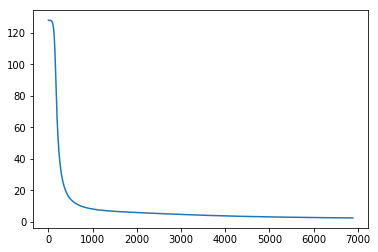

In [12]:
epochs = 10000
learning_rate = 1e-4
losses = []

for i in tqdm(range(epochs)):
    
    y_pred = np.matmul(X, Theta)
    y_pred = np.abs(y_pred*r)
    l = y_pred - y
    loss = np.sum(np.square(l))/numMovies
    
    if i%2 == 0:
        dTheta = np.dot(X.T, l)
        Theta = Theta - learning_rate*dTheta
        
    else:
        dX = np.dot(l, Theta.T)
        X = X - learning_rate*dX
    if i == 0:
        losses.append(loss)
        continue
    if loss > losses[-1]:
        print('Stopping after {} iterations'.format(i))
        print('Minima Located at : {}'.format(loss))
        break
    losses.append(loss)

print(loss)
plt.plot(losses)
plt.show()       

In [18]:
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
pd.DataFrame(y_pred).head()

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.0,0.0,0.0,0.0,0.000000,0.0,3.669833,0.0,4.116274,0.0,...,0.00000,3.713993,3.758558,0.000000,0.0,0.0,0.0,0.0,4.748742,4.477453
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,3.44586,0.000000,0.000000,3.353594,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,3.680357,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.000000,0.000000,3.610984,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.000000,0.000000,2.814146,0.0,0.0,0.0,0.0,0.000000,0.000000
